In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#dataset utilizado - "heart_2020_cleaned.csv"
df = pd.read_csv(r"heart_2020_cleaned.csv")
test = df.sample(1) #numero de valores a usar para prediccion
train = df[~df.isin(test)] #valores a usar para entrenamiento
train.dropna(inplace = True)

El tipo de problema que se resolverá es por clasificación, esto debido a que solo hay dos posibles salidas, 1 o 0 (binario)

In [3]:
print(train.describe())

                BMI  PhysicalHealth   MentalHealth      SleepTime
count  266128.00000   266128.000000  266128.000000  266128.000000
mean       28.33846        3.356471       3.896768       7.101301
std         6.36968        7.933582       7.955905       1.440450
min        12.02000        0.000000       0.000000       1.000000
25%        24.03000        0.000000       0.000000       6.000000
50%        27.34000        0.000000       0.000000       7.000000
75%        31.46000        2.000000       3.000000       8.000000
max        94.85000       30.000000      30.000000      24.000000


In [4]:
from sklearn import preprocessing #convertimos los Yes y No de HeartDisease en binario
label = preprocessing.LabelEncoder()

train['HeartDisease']= label.fit_transform(train['HeartDisease'])
test['HeartDisease']= label.fit_transform(test['HeartDisease'])
print(train['HeartDisease'].unique())

[0 1]


In [5]:
train['AlcoholDrinking']= label.fit_transform(train['AlcoholDrinking'])
test['AlcoholDrinking']= label.fit_transform(test['AlcoholDrinking'])
print(train['AlcoholDrinking'].unique())

[0 1]


In [6]:
# Función sigmoide
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Función de costo
def compute_cost(y, y_pred):
    m = len(y)
    return -1/m * np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))

# Gradiente descendente
def gradient_descent(X, y, alpha, epochs):
    m, n = X.shape
    theta = np.zeros(n)
    costs = []

    for _ in range(epochs):
        z = np.dot(X, theta)
        y_pred = sigmoid(z)
        gradient = np.dot(X.T, (y_pred - y)) / m
        theta -= alpha * gradient
        cost = compute_cost(y, y_pred)
        costs.append(cost)

    return theta, costs


In [11]:
X = np.array(train['AlcoholDrinking'])
y = np.array(train['HeartDisease'])

In [12]:
# Agrega una columna de unos a X para el término de sesgo (bias)
X = np.column_stack((np.ones(len(X)), X))

# Configuración de hiperparámetros
learning_rate = 0.01
num_epochs = 1000

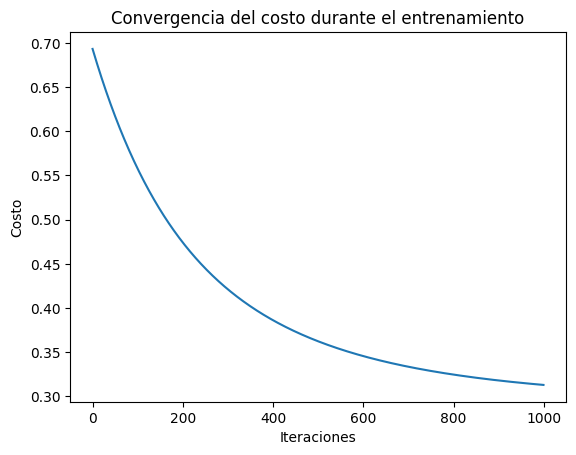

In [17]:
# Entrenamiento del modelo
trained_theta, costs = gradient_descent(X, y, learning_rate, num_epochs)

# Visualización de la convergencia del costo
plt.plot(range(num_epochs), costs)
plt.xlabel('Iteraciones')
plt.ylabel('Costo')
plt.title('Convergencia del costo durante el entrenamiento')
plt.show()

In [35]:
# Predicciones
def predict(X, theta):
    z = np.dot(X, theta)
    return sigmoid(z)

# Probabilidad de que X sea de la clase positiva
sample = np.array([1,0])  # Cambia esto por la entrada que quieras predecir
probability = predict(sample, trained_theta)
print(f'Probabilidad de ser clase positiva: {probability:.2f}')

Probabilidad de ser clase positiva: 0.15
